In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import time

In [42]:
# Encode Country and Item using OneHotEncoder

merged_data = pd.read_csv('/content/Final_merged_data.csv')

merged_data_onehot = pd.get_dummies(merged_data, columns=['Item'], prefix=['Item'])
merged_data = merged_data_onehot.drop('Yield (hg/ha)', axis=1)
merged_data['Yield (hg/ha)'] = merged_data_onehot['Yield (hg/ha)']
merged_data = merged_data.drop(['Year', 'Country'], axis = 1)
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,190.783333,26.6,313639.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8275
1,190.783333,26.6,313639.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12623
2,190.783333,26.6,313639.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109367
3,190.783333,26.6,313639.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,568256
4,190.783333,26.6,313639.25,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50244
716,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,187605
717,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11544
718,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1528


In [43]:
# Scaling Features

y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

scaler = MinMaxScaler()
data_no_yield = pd.DataFrame(scaler.fit_transform(x), index = y.index)
data_no_yield.columns = x.columns
data_no_yield.insert(len(data_no_yield.columns), 'Yield (hg/ha)', y)

merged_data = data_no_yield
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,0.669914,0.166667,0.748439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8275
1,0.669914,0.166667,0.748439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12623
2,0.669914,0.166667,0.748439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109367
3,0.669914,0.166667,0.748439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568256
4,0.669914,0.166667,0.748439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50244
716,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,187605
717,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11544
718,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1528


In [44]:
# splitting the data into training and testing (80/20)

# excluding Yield (hg/ha) values as it is what the ML model should be predicting
y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Create KNN model

from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

# Define hyperparameter grid (varying values of k)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

search = GridSearchCV(knn, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'n_neighbors': 3}


In [46]:
# train the XGBoost model

start_train_time = time.time()
knn = KNeighborsRegressor(n_neighbors = search.best_params_['n_neighbors'])
knn.fit(x_train, y_train)
end_train_time = time.time()

# make predictions

start_pred_time = time.time()
y_pred = knn.predict(x_test)
end_pred_time = time.time()

# find time taken

time_train_taken = end_train_time - start_train_time
time_pred_taken = end_pred_time - start_pred_time

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
max_err = max_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared (R2): 0.98
Mean Absolute Error (MAE): 9466.43
Mean Squared Error (MSE): 552127994.13
Root Mean Squared Error (RMSE): 23497.40
Max Error: 167645.67
Mean Absolute Percentage Error (MAPE): 0.10%


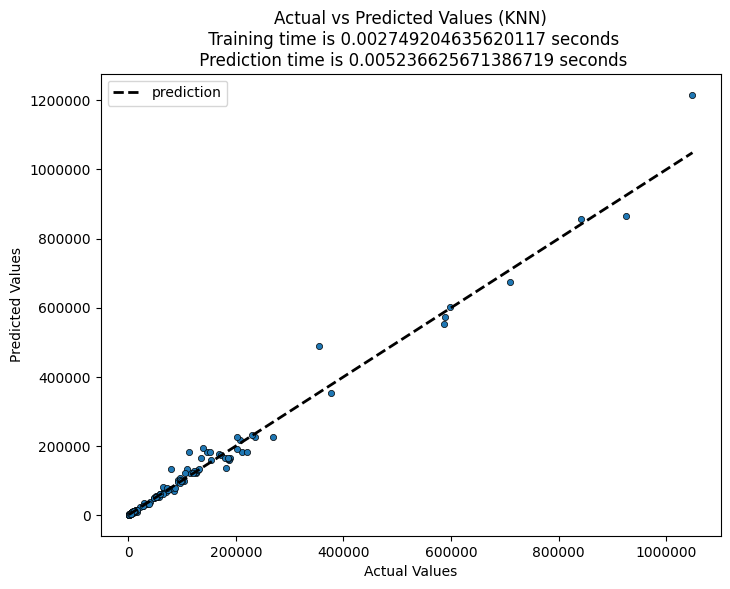

In [50]:
# plot the actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s = 20, edgecolors = 'black', linewidth = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'prediction')

plt.title('Actual vs Predicted Values (KNN)\n Training time is ' + str(time_train_taken) + ' seconds\n Prediction time is ' + str(time_pred_taken) + ' seconds')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ticklabel_format(style='plain', axis='both')
plt.legend()
plt.show()